<a href="https://colab.research.google.com/github/smraytech/test/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
You should build a machine learning pipeline using a linear regression model. In particular, you should do the following:
- Load the `housing` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a linear regression model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/housing.csv')
df.head()

,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [ ]:
df.shape

(545, 14)

In [ ]:
df.columns

Index(['id', 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'stories.1',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                545 non-null    int64  
 1   price             545 non-null    int64  
 2   area              545 non-null    int64  
 3   bedrooms          545 non-null    int64  
 4   bathrooms         545 non-null    int64  
 5   stories           545 non-null    int64  
 6   stories.1         545 non-null    int64  
 7   guestroom         545 non-null    int64  
 8   basement          545 non-null    int64  
 9   hotwaterheating   545 non-null    int64  
 10  airconditioning   545 non-null    int64  
 11  parking           545 non-null    int64  
 12  prefarea          545 non-null    int64  
 13  furnishingstatus  545 non-null    float64
dtypes: float64(1), int64(13)
memory usage: 59.7 KB


In [ ]:
df.describe()

,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545.00000,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,272.00000,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.465138
std,157.47222,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.380686
min,0.00000,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.00000,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,272.00000,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,408.00000,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,544.00000,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


In [ ]:
# Target distribution
print(df["price"].value_counts())

price
4200000    17
3500000    17
4900000    12
5250000     9
5600000     9
           ..
2135000     1
1960000     1
1855000     1
1820000     1
1767150     1
Name: count, Length: 219, dtype: int64


2. Data Exploration

In [ ]:
df.isnull().sum()

,0
id,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
stories.1,0
guestroom,0
basement,0
hotwaterheating,0


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
id,int64
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
stories.1,int64
guestroom,int64
basement,int64
hotwaterheating,int64


# Correlation with price (numerical only)

In [ ]:
print("\nCorrelation with price:\n", df.corr(numeric_only=True)["price"].sort_values(ascending=False))


Correlation with price:
 price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
furnishingstatus    0.304721
stories.1           0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
id                 -0.929878
Name: price, dtype: float64


3. Data Cleaning & Preprocessing

**Here l drop unnecessary columns (id, duplicate stories.1) and encode categorical features.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

Drop ID and duplicate column

In [ ]:
df = df.drop(columns=["id", "stories.1"], errors="ignore")

# Features & target

In [ ]:
X = df.drop("price", axis=1)
y = df["price"]

**Separate numeric vs categorical**

In [ ]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

In [ ]:
# Numeric transformer
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical transformer
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Full preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)

4. Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

5. Train Models


*  a) Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
dt_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(max_depth=5, random_state=42))
])

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree MSE:", mse_dt)

Decision Tree MSE: 2792037769749.717


b) K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", KNeighborsRegressor(n_neighbors=5))
])

knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
print("KNN MSE:", mse_knn)


KNN MSE: 2291371580823.853


c) Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)

Linear Regression MSE: 1807455823934.604


6. Compare Models

In [ ]:
print("Decision Tree MSE:", mse_dt)
print("KNN MSE:", mse_knn)
print("Linear Regression MSE:", mse_lr)

Decision Tree MSE: 2792037769749.717
KNN MSE: 2291371580823.853
Linear Regression MSE: 1807455823934.604


In [ ]:
import matplotlib.pyplot as plt

*   The red dashed line represents perfect predictions (where predicted = actual).
*   The closer the scatter points are to this line, the better the model.

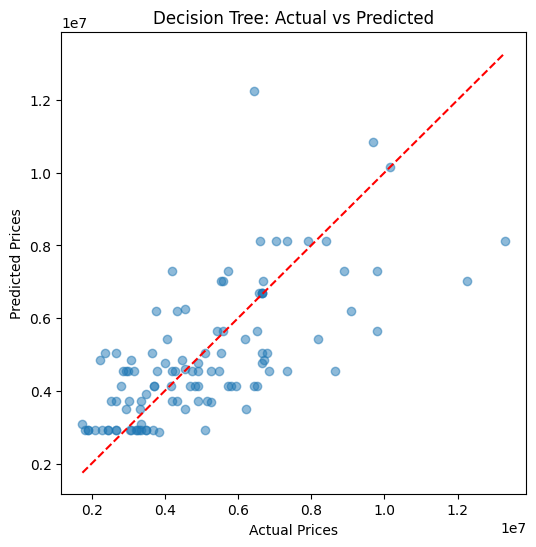

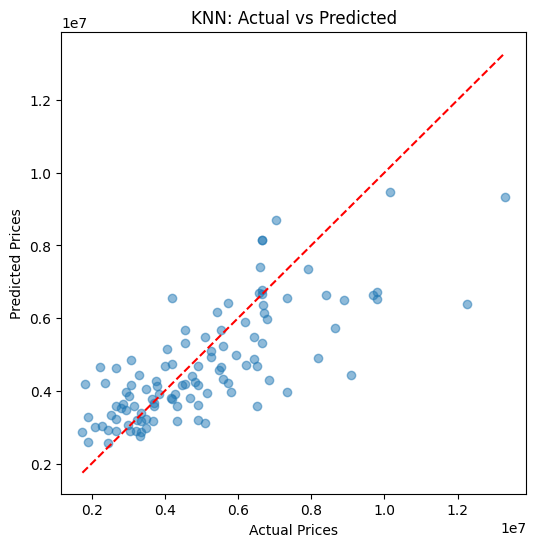

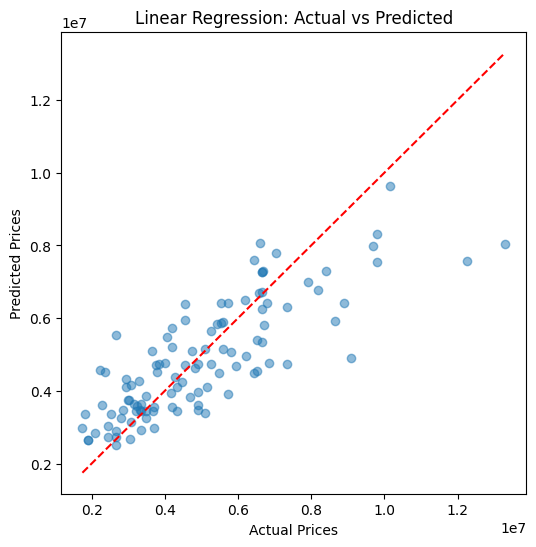

In [ ]:
# Function to plot predictions
def plot_predictions(y_test, y_pred, title):
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(title)
    plt.show()

# Plot for Decision Tree
plot_predictions(y_test, y_pred_dt, "Decision Tree: Actual vs Predicted")

# Plot for KNN
plot_predictions(y_test, y_pred_knn, "KNN: Actual vs Predicted")

# Plot for Linear Regression
plot_predictions(y_test, y_pred_lr, "Linear Regression: Actual vs Predicted")

*   The R² score on each plot is very helpful. It quantifies how well the predictions match the actual values and complements the visual comparison.
*   R² shown on each plot

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

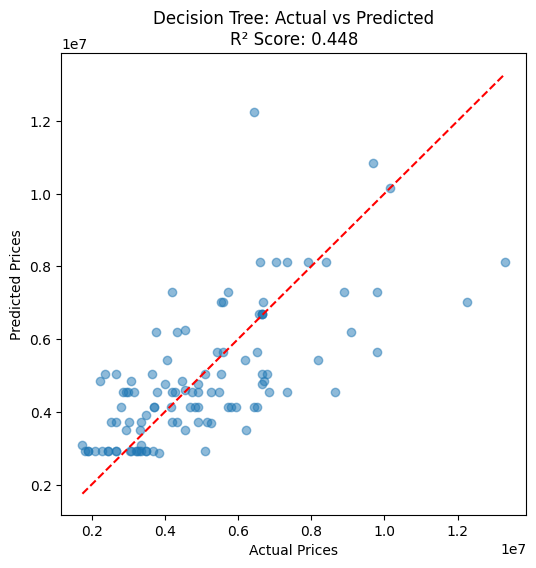

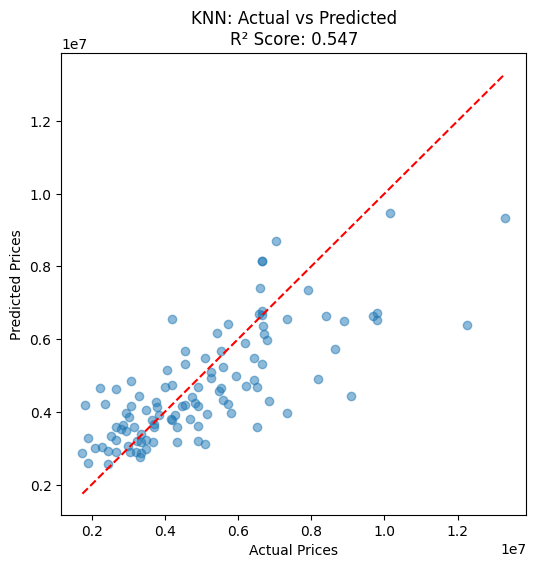

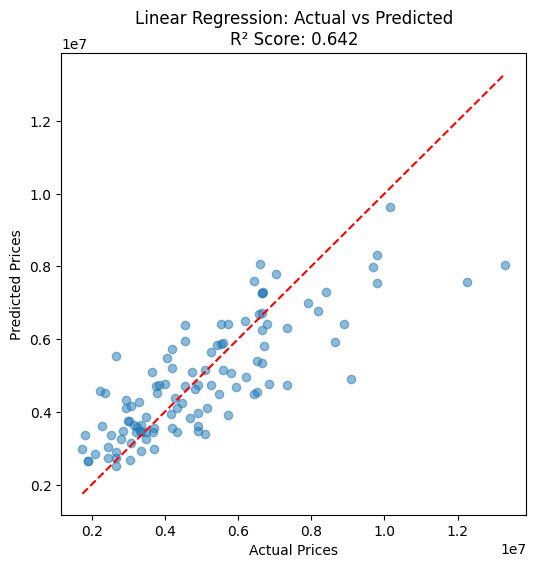

In [ ]:
# Function to plot predictions with R² score
def plot_predictions(y_test, y_pred, title):
    r2 = r2_score(y_test, y_pred)

    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"{title}\nR² Score: {r2:.3f}")
    plt.show()

# Plot for Decision Tree
plot_predictions(y_test, y_pred_dt, "Decision Tree: Actual vs Predicted")

# Plot for KNN
plot_predictions(y_test, y_pred_knn, "KNN: Actual vs Predicted")

# Plot for Linear Regression
plot_predictions(y_test, y_pred_lr, "Linear Regression: Actual vs Predicted")

**Now each plot above shows how well the model explains the variance in house prices.**

Enhancing the plots so they show R², MAE, and RMSE for each model. This way l will have both statistical metrics and the visual comparison in one place.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

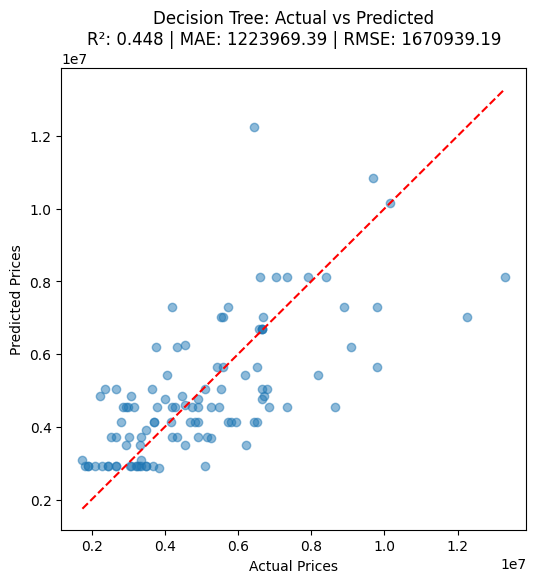

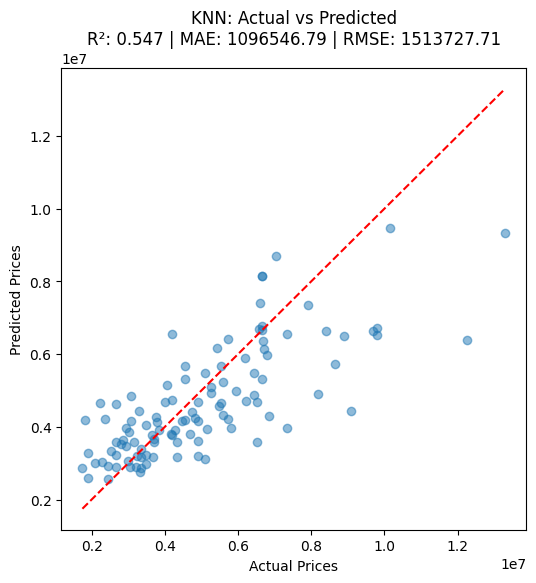

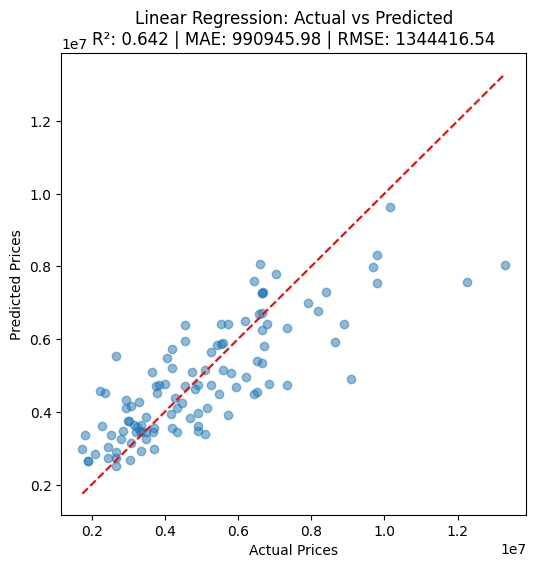

In [ ]:
# Function to plot predictions with R², MAE, RMSE
def plot_predictions(y_test, y_pred, title):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"{title}\nR²: {r2:.3f} | MAE: {mae:.2f} | RMSE: {rmse:.2f}")
    plt.show()

# Plot for Decision Tree
plot_predictions(y_test, y_pred_dt, "Decision Tree: Actual vs Predicted")

# Plot for KNN
plot_predictions(y_test, y_pred_knn, "KNN: Actual vs Predicted")

# Plot for Linear Regression
plot_predictions(y_test, y_pred_lr, "Linear Regression: Actual vs Predicted")

*   R² tells you how much of the variance is explained.
*   MAE is the average absolute error (easy to interpret).
*   RMSE penalizes large errors more strongly.